# TVA

In [1]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.utils import VotingSchemas
from src.outcomes import *
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
from src.coalitions import find_stable_coalitions_by_compromising
import os
import numpy as np

In [2]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

## Input Voting Preference

In [3]:
voting = utils.read_voting(path_voting, table_name="voting6")
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5,voter_6
preference_0,C,B,C,C,B,A,A
preference_1,A,D,D,D,A,B,B
preference_2,D,C,A,B,D,D,D
preference_3,B,A,B,A,C,C,C


## Voting Outcomes

In [4]:
outcomes = all_schemas_outcomes(voting)
outcomes_df = all_schemas_outcomes_to_pandas(outcomes)
outcomes_df

,A,B,C,D,Winner
Plurality Voting,2,2,3,0,C
Voting for Two,4,4,3,3,A
Veto Voting,5,5,4,7,D
Borda Voting,11,11,10,10,A


## Happiness Level

### Plurality Voting

Voters Happiness Level


,Happiness Level
0,1.000000
1,0.410487
2,1.000000
3,1.000000
4,0.000000
5,0.000000
6,0.000000



Overall Happiness Level: 3.410486590766719

Happiness Level Distribution


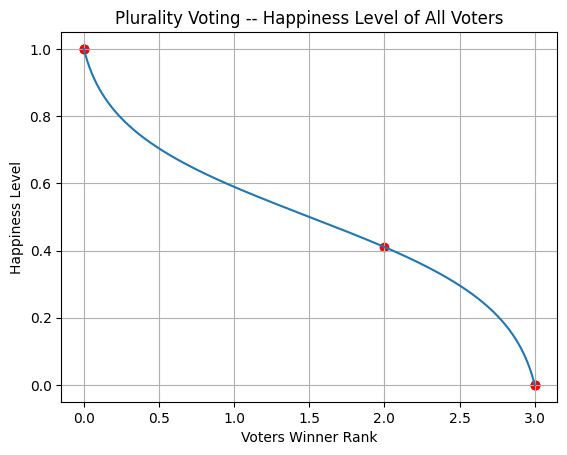


Histogram of Happiness Level


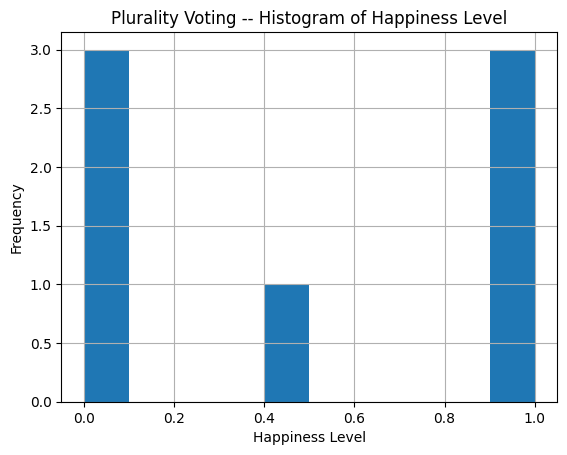

In [5]:
pv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.PLURALITY_VOTING.value].winner,
    VotingSchemas.PLURALITY_VOTING,
).run(show=True)

### Voting for Two

Voters Happiness Level


,Happiness Level
0,0.589513
1,0.000000
2,0.410487
3,0.000000
4,0.589513
5,1.000000
6,1.000000



Overall Happiness Level: 3.589513409233281

Happiness Level Distribution


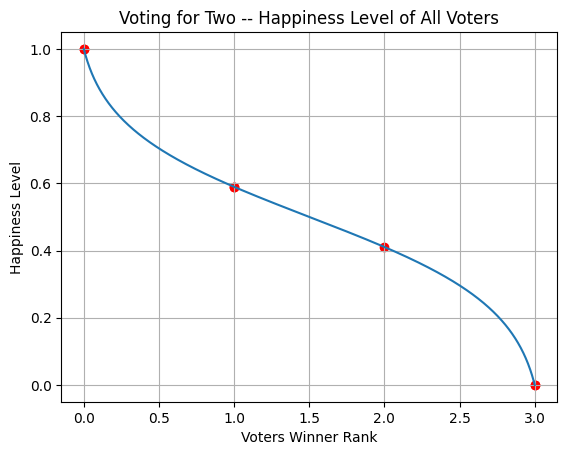


Histogram of Happiness Level


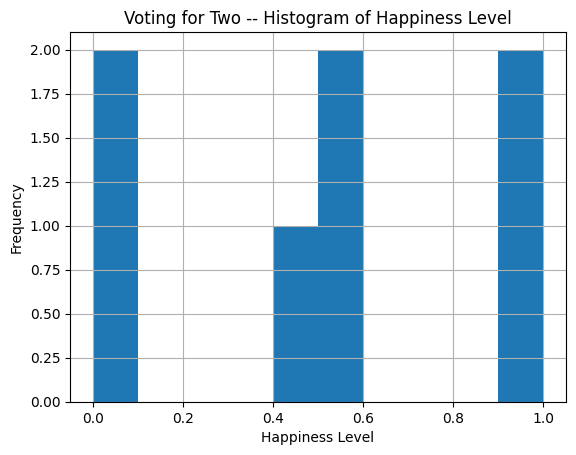

In [6]:
vt_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VOTING_FOR_TWO.value].winner,
    VotingSchemas.VOTING_FOR_TWO,
).run(show=True)

### Veto Voting

Voters Happiness Level


,Happiness Level
0,0.410487
1,0.589513
2,0.589513
3,0.589513
4,0.410487
5,0.410487
6,0.410487



Overall Happiness Level: 3.410486590766719

Happiness Level Distribution


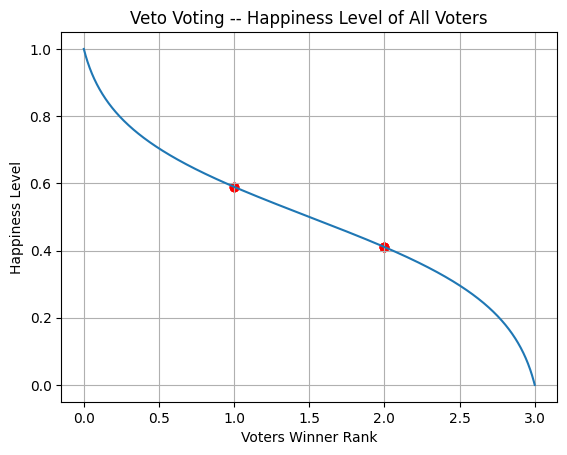


Histogram of Happiness Level


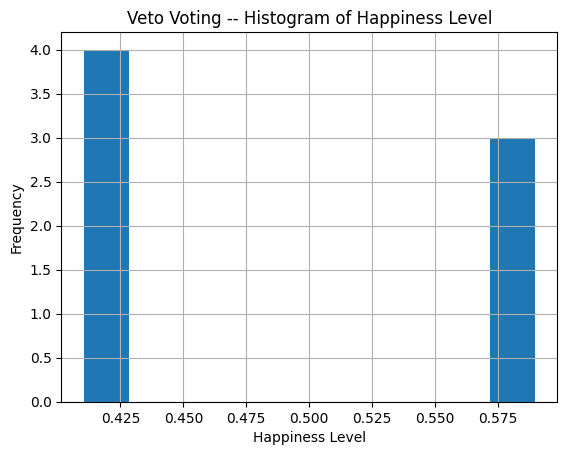

In [7]:
vv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VETO_VOTING.value].winner,
    VotingSchemas.VETO_VOTING,
).run(show=True)

### Borda Voting

Voters Happiness Level


,Happiness Level
0,0.589513
1,0.000000
2,0.410487
3,0.000000
4,0.589513
5,1.000000
6,1.000000



Overall Happiness Level: 3.589513409233281

Happiness Level Distribution


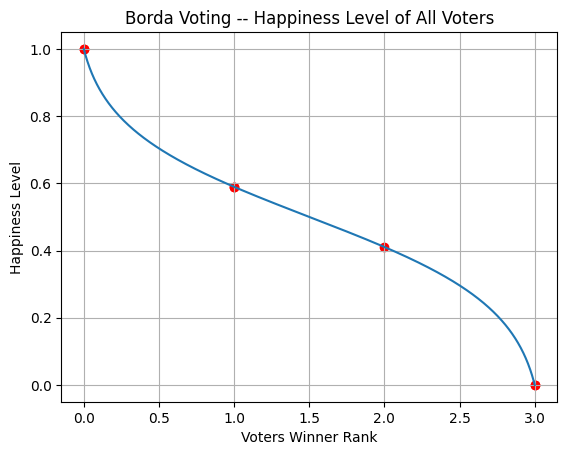


Histogram of Happiness Level


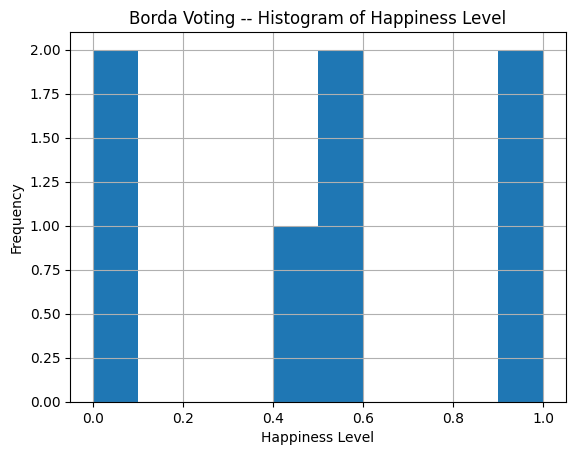

In [8]:
bv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.BORDA_VOTING.value].winner,
    VotingSchemas.BORDA_VOTING,
).run(show=True)

## Strategic Voting

### Plurality Voting

In [9]:
pv_s = StrategicVoting(voting, pv_h, plurality_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,4,"[A, B, D, C]",A,0.589513,0.0,3.589513,3.410487
1,4,"[A, D, B, C]",A,0.589513,0.0,3.589513,3.410487
2,5,"[B, A, D, C]",B,0.589513,0.0,3.589513,3.410487
3,5,"[B, D, A, C]",B,0.589513,0.0,3.589513,3.410487
4,6,"[B, A, D, C]",B,0.589513,0.0,3.589513,3.410487
5,6,"[B, D, A, C]",B,0.589513,0.0,3.589513,3.410487


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,4,"[A, B, D, C]",A,0.589513,0.0,3.589513,3.410487
2,5,"[B, A, D, C]",B,0.589513,0.0,3.589513,3.410487
4,6,"[B, A, D, C]",B,0.589513,0.0,3.589513,3.410487


Risk: 0.442135056924961


### Voting for Two

In [10]:
vt_s = StrategicVoting(voting, vt_h, for_two_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,3,"[C, B, D, A]",B,0.410487,0.000000,3.589513,3.589513
1,3,"[D, B, C, A]",B,0.410487,0.000000,3.589513,3.589513
2,3,"[B, C, D, A]",B,0.410487,0.000000,3.589513,3.589513
3,3,"[B, D, C, A]",B,0.410487,0.000000,3.589513,3.589513
4,4,"[B, D, A, C]",B,1.000000,0.589513,3.589513,3.589513
5,4,"[B, D, C, A]",B,1.000000,0.589513,3.589513,3.589513
6,4,"[B, C, A, D]",B,1.000000,0.589513,3.589513,3.589513
7,4,"[B, C, D, A]",B,1.000000,0.589513,3.589513,3.589513
8,4,"[D, B, A, C]",B,1.000000,0.589513,3.589513,3.589513
9,4,"[D, B, C, A]",B,1.000000,0.589513,3.589513,3.589513


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
4,4,"[B, D, A, C]",B,1.000000,0.589513,3.589513,3.589513
0,3,"[C, B, D, A]",B,0.410487,0.000000,3.589513,3.589513


Risk: 0.16419463630668746


### Veto Voting

In [11]:
vv_s = StrategicVoting(voting, vv_h, veto_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H


Risk: 0.0


### Borda Voting

In [14]:
bv_s = StrategicVoting(voting, bv_h, borda_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,1,"[C, B, D, A]",C,0.410487,0.000000,3.410487,3.589513
1,1,"[C, D, B, A]",C,0.410487,0.000000,3.410487,3.589513
2,3,"[C, B, D, A]",B,0.410487,0.000000,3.589513,3.589513
3,3,"[D, B, C, A]",B,0.410487,0.000000,3.589513,3.589513
4,3,"[B, C, D, A]",B,0.410487,0.000000,3.589513,3.589513
5,3,"[B, D, C, A]",B,0.410487,0.000000,3.589513,3.589513
6,4,"[B, D, A, C]",B,1.000000,0.589513,3.589513,3.589513
7,4,"[B, D, C, A]",B,1.000000,0.589513,3.589513,3.589513


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
6,4,"[B, D, A, C]",B,1.000000,0.589513,3.589513,3.589513
2,3,"[C, B, D, A]",B,0.410487,0.000000,3.589513,3.589513
0,1,"[C, B, D, A]",C,0.410487,0.000000,3.410487,3.589513


Risk: 0.2462919544600312


## Coalitions

### Plurality Voting

In [15]:
c_pv = find_stable_coalitions_by_compromising(
    4,
    pd.DataFrame(voting).T,
    pv_h,
    outcomes[VotingSchemas.PLURALITY_VOTING.value],
    VotingSchemas.PLURALITY_VOTING,
    plurality_outcome,
)

display(c_pv)

Pushing B made everyone in the group 5 happier, here the new winner:   {'A': 0, 'B': 4, 'C': 3, 'D': 0}
is it stable?
True
Pushing B made everyone in the group 10 happier, here the new winner:   {'A': 0, 'B': 4, 'C': 3, 'D': 0}
is it stable?
True


,coalition_group,voter,strategic_voting,is_stable,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,5,"[B, A, D, C]",True,B,0.589513,0.000000,3.589513,3.410487
1,5,6,"[B, A, D, C]",True,B,0.589513,0.000000,3.589513,3.410487
2,10,1,"[B, D, C, A]",True,B,1.000000,0.410487,3.589513,3.410487
3,10,5,"[B, A, D, C]",True,B,0.589513,0.000000,3.589513,3.410487
4,10,6,"[B, A, D, C]",True,B,0.589513,0.000000,3.589513,3.410487


### Borda Voting

In [16]:
cp_bv = find_stable_coalitions_by_compromising(
    4,
    pd.DataFrame(voting).T,
    bv_h,
    outcomes[VotingSchemas.BORDA_VOTING.value],
    VotingSchemas.BORDA_VOTING,
    borda_outcome,
)
display(cp_bv)

Pushing D made everyone in the group 5 happier, here the new winner:   {'A': 11, 'B': 11, 'C': 8, 'D': 12}
is it stable?
True
Pushing C made everyone in the group 10 happier, here the new winner:   {'A': 11, 'B': 10, 'C': 12, 'D': 9}
is it stable?
True
Pushing D made everyone in the group 10 happier, here the new winner:   {'A': 11, 'B': 10, 'C': 8, 'D': 13}
is it stable?
True


,coalition_group,voter,strategic_voting,is_stable,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,2,"[D, C, A, B]",True,D,0.589513,0.410487,3.410487,3.589513
1,5,3,"[D, C, B, A]",True,D,0.589513,0.000000,3.410487,3.589513
2,10,1,"[C, B, D, A]",True,C,0.410487,0.000000,3.410487,3.589513
3,10,2,"[C, D, A, B]",True,C,1.000000,0.410487,3.410487,3.589513
4,10,3,"[C, D, B, A]",True,C,1.000000,0.000000,3.410487,3.589513
5,10,1,"[D, B, C, A]",True,D,0.589513,0.000000,3.410487,3.589513
6,10,2,"[D, C, A, B]",True,D,0.589513,0.410487,3.410487,3.589513
7,10,3,"[D, C, B, A]",True,D,0.589513,0.000000,3.410487,3.589513
